In [132]:
#Dependencies
import numpy as np
import pandas as pd
from pathlib import Path


In [133]:
#from sklearn.feature_extraction.text import CountVectorizer

In [134]:
#df = pd.read_csv('Kindle_Reviews.csv')
#df = pd.read_csv('kindle_review_updated.csv')
df = pd.read_csv('data.csv')


In [135]:
from pycaret.nlp import *
from pycaret.classification import *
import nltk
from nltk.corpus import stopwords


In [136]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\doyel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [137]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [138]:
stop = stopwords.words('english')

In [139]:
#df['reviewText_sws'] = df['reviewText'].apply(lambda x: [item for item in str(x).split() if item not in stopwords.words('english')])
df['reviewText_sws'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [140]:
sid = SentimentIntensityAnalyzer()

In [141]:
scores = []

for i in df["reviewText"]:

    scores.append(sid.polarity_scores(i)["compound"])

df["review_rating_score"] = scores

In [142]:
scores_summary = []

for i in df["summary"]:

    scores_summary.append(sid.polarity_scores(i)["compound"])

df["summary_rating_score"] = scores_summary


In [143]:
df

,actual_ratings,reviewText,summary,verified,vote,reviewText_sws,review_rating_score,summary_rating_score
0,4,"pretty good story, a little exaggerated, but I...",pretty good story,True,0,"pretty good story, little exaggerated, I liked...",0.9824,0.7269
1,5,"If you've read other max brand westerns, you k...",A very good book,True,0,"If read max brand westerns, know expect, not, ...",0.5080,0.4927
2,5,"Love Max, always a fun twist",Five Stars,True,0,"Love Max, always fun twist",0.8176,0.0000
3,5,"As usual for him, a good book",a good,True,0,"As usual him, good book",0.4404,0.4404
4,5,MB is one of the original western writers and ...,A Western,True,2,MB one original western writers many years man...,0.8271,0.0000
...,...,...,...,...,...,...,...,...
995,5,I have enjoyed all the Sisterhood books and th...,The Jury review,True,0,I enjoyed Sisterhood books one exception. Just...,0.2732,0.0000
996,2,I have read a couple other books in this serie...,Waste of time,True,0,I read couple books series unfortunately forgo...,-0.7676,-0.4215
997,5,Fast-paced and well-written. I have some catch...,Entertaining,True,0,Fast-paced well-written. I catching since I st...,0.8016,0.4404
998,5,Enjoyed re reading.,Five Stars,True,0,Enjoyed reading.,0.5106,0.0000


In [144]:
df['length_summary'] = df['summary'].apply(len)

In [145]:
df['length_review'] = df['reviewText'].apply(len)
df.head(10)

,actual_ratings,reviewText,summary,verified,vote,reviewText_sws,review_rating_score,summary_rating_score,length_summary,length_review
0,4,"pretty good story, a little exaggerated, but I...",pretty good story,True,0,"pretty good story, little exaggerated, I liked...",0.9824,0.7269,17,205
1,5,"If you've read other max brand westerns, you k...",A very good book,True,0,"If read max brand westerns, know expect, not, ...",0.5080,0.4927,16,141
2,5,"Love Max, always a fun twist",Five Stars,True,0,"Love Max, always fun twist",0.8176,0.0000,10,28
3,5,"As usual for him, a good book",a good,True,0,"As usual him, good book",0.4404,0.4404,6,29
4,5,MB is one of the original western writers and ...,A Western,True,2,MB one original western writers many years man...,0.8271,0.0000,9,235
5,5,great book,Five Stars,True,0,great book,0.6249,0.0000,10,10
6,3,"A good, solid Western - yes, a little contrive...","Fast read, entertaining, like a 1930s Western ...",True,3,"A good, solid Western - yes, little contrived ...",0.9833,0.6597,51,405
7,4,ALMOST BEEN TOO LONG SINCE I READ IT. GOOD REA...,ANOTHER GOOD WESTERN,True,0,ALMOST BEEN TOO LONG SINCE I READ IT. GOOD REA...,0.4404,0.4404,20,79
8,5,Enjoyed this book and will read more from this...,Good,True,0,"Enjoyed book read writer,have read books read ...",0.7764,0.4404,4,117
9,4,A very good read for you Western fans. Great ...,Get it,True,0,A good read Western fans. Great price too.,0.8070,0.0000,6,56


In [146]:
new_df = df.drop(df.index[df['actual_ratings'] == 3])

In [147]:
new_df['derived_ratings'] = 0

In [148]:
new_df.loc[(df['actual_ratings'] == 4) | (new_df['actual_ratings'] == 5), 'derived_ratings'] = 'positive'


In [149]:
new_df.loc[(df['actual_ratings'] == 1) | (new_df['actual_ratings'] == 2), 'derived_ratings'] = 'negative'


In [150]:
new_df

,actual_ratings,reviewText,summary,verified,vote,reviewText_sws,review_rating_score,summary_rating_score,length_summary,length_review,derived_ratings
0,4,"pretty good story, a little exaggerated, but I...",pretty good story,True,0,"pretty good story, little exaggerated, I liked...",0.9824,0.7269,17,205,positive
1,5,"If you've read other max brand westerns, you k...",A very good book,True,0,"If read max brand westerns, know expect, not, ...",0.5080,0.4927,16,141,positive
2,5,"Love Max, always a fun twist",Five Stars,True,0,"Love Max, always fun twist",0.8176,0.0000,10,28,positive
3,5,"As usual for him, a good book",a good,True,0,"As usual him, good book",0.4404,0.4404,6,29,positive
4,5,MB is one of the original western writers and ...,A Western,True,2,MB one original western writers many years man...,0.8271,0.0000,9,235,positive
...,...,...,...,...,...,...,...,...,...,...,...
995,5,I have enjoyed all the Sisterhood books and th...,The Jury review,True,0,I enjoyed Sisterhood books one exception. Just...,0.2732,0.0000,15,150,positive
996,2,I have read a couple other books in this serie...,Waste of time,True,0,I read couple books series unfortunately forgo...,-0.7676,-0.4215,13,455,negative
997,5,Fast-paced and well-written. I have some catch...,Entertaining,True,0,Fast-paced well-written. I catching since I st...,0.8016,0.4404,12,206,positive
998,5,Enjoyed re reading.,Five Stars,True,0,Enjoyed reading.,0.5106,0.0000,10,19,positive


In [151]:
new_df.drop(['reviewText', 'summary', 'verified','reviewText_sws'], axis=1, inplace=True)

In [152]:
new_df.drop(['actual_ratings'], axis=1, inplace=True)

In [153]:
new_df.head(5)

,vote,review_rating_score,summary_rating_score,length_summary,length_review,derived_ratings
0,0,0.9824,0.7269,17,205,positive
1,0,0.5080,0.4927,16,141,positive
2,0,0.8176,0.0000,10,28,positive
3,0,0.4404,0.4404,6,29,positive
4,2,0.8271,0.0000,9,235,positive


In [154]:
#Shuffle your dataset 
new_shuffle_df = new_df.sample(frac=1)

# Define a size for your train set 
new_train_size = int(0.75 * len(new_df))

# Split your dataset 
new_train_df = new_shuffle_df[:new_train_size]
new_test_df  = new_shuffle_df[new_train_size:]

In [155]:
new_train_df.head(5)

,vote,review_rating_score,summary_rating_score,length_summary,length_review,derived_ratings
704,12,0.9898,-0.3412,51,2759,positive
246,0,0.7171,0.0000,14,129,positive
824,0,0.8834,0.6249,12,118,positive
935,3,0.8462,0.0000,15,350,negative
497,0,-0.0711,0.0000,40,1875,positive


In [156]:
new_test_df.head()


,vote,review_rating_score,summary_rating_score,length_summary,length_review,derived_ratings
317,0,0.5400,0.5400,26,227,positive
692,4,-0.6597,-0.4019,41,323,negative
124,0,0.9465,0.4215,39,501,positive
649,0,0.6633,0.5719,14,150,positive
784,0,0.8979,0.7249,27,108,positive


In [157]:
new_clf=setup(data=new_train_df,target='derived_ratings')

,Description,Value
0,session_id,5759
1,Target,derived_ratings
2,Target Type,Binary
3,Label Encoded,"negative: 0, positive: 1"
4,Original Data,"(626, 6)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [100]:
K_FOLDS = 5
top_model = compare_models(sort='F1',
                           fold=K_FOLDS,
                           n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8870,0.8659,0.9623,0.9115,0.9358,0.4552,0.4815,0.1040
et,Extra Trees Classifier,0.8836,0.8686,0.9603,0.9097,0.9340,0.4328,0.4553,0.0960
gbc,Gradient Boosting Classifier,0.8750,0.8451,0.9464,0.9120,0.9286,0.4226,0.4331,0.0500
svm,SVM - Linear Kernel,0.8613,0.0000,1.0000,0.8613,0.9255,0.0000,0.0000,0.0100
dummy,Dummy Classifier,0.8613,0.5000,1.0000,0.8613,0.9255,0.0000,0.0000,0.0100
lightgbm,Light Gradient Boosting Machine,0.8682,0.8468,0.9424,0.9084,0.9245,0.3915,0.4072,0.3560
lr,Logistic Regression,0.8596,0.8513,0.9663,0.8821,0.9221,0.2199,0.2577,1.3340
knn,K Neighbors Classifier,0.8510,0.4847,0.9841,0.8624,0.9192,0.0134,0.0176,0.7920
ada,Ada Boost Classifier,0.8579,0.7925,0.9404,0.8996,0.9191,0.3262,0.3438,0.0560
ridge,Ridge Classifier,0.8494,0.0000,0.9703,0.8701,0.9172,0.0964,0.1187,0.0120


In [158]:
tuned_model = tune_model(top_model[1], optimize='F1',
                         choose_better=True, fold=K_FOLDS);

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8523,0.5000,1.0000,0.8523,0.9202,0.0000,0.0000
1,0.8523,0.5000,1.0000,0.8523,0.9202,0.0000,0.0000
2,0.8523,0.5000,1.0000,0.8523,0.9202,0.0000,0.0000
3,0.8621,0.5000,1.0000,0.8621,0.9259,0.0000,0.0000
4,0.8621,0.5000,1.0000,0.8621,0.9259,0.0000,0.0000
Mean,0.8562,0.5000,1.0000,0.8562,0.9225,0.0000,0.0000
Std,0.0048,0.0000,0.0000,0.0048,0.0028,0.0000,0.0000


In [159]:
bagged_model = ensemble_model(tuned_model, optimize="F1",
                              fold=K_FOLDS) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8864,0.8605,0.9867,0.8916,0.9367,0.3948,0.4512
1,0.8523,0.8790,0.9333,0.8974,0.9150,0.3515,0.3555
2,0.8750,0.8313,0.9600,0.9000,0.9290,0.4098,0.4254
3,0.8966,0.8972,0.9867,0.9024,0.9427,0.4238,0.4741
4,0.8851,0.8617,0.9467,0.9221,0.9342,0.4803,0.4829
Mean,0.8790,0.8659,0.9627,0.9027,0.9315,0.4120,0.4378
Std,0.0150,0.0219,0.0213,0.0103,0.0093,0.0419,0.0457


In [160]:
boosted_model = ensemble_model(tuned_model, optimize="F1",
                               fold=K_FOLDS, method="Boosting") 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8523,0.8492,0.9600,0.8780,0.9172,0.2454,0.2686
1,0.8750,0.8779,0.9467,0.9103,0.9281,0.4512,0.4564
2,0.8750,0.8267,0.9467,0.9103,0.9281,0.4512,0.4564
3,0.8851,0.8506,0.9733,0.9012,0.9359,0.3882,0.4173
4,0.8851,0.8111,0.9467,0.9221,0.9342,0.4803,0.4829
Mean,0.8745,0.8431,0.9547,0.9044,0.9287,0.4033,0.4163
Std,0.0120,0.0228,0.0107,0.0147,0.0066,0.0845,0.0768


In [173]:
#best_model = bagged_model
best_model = bagged_model
predict_model(best_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8777,0.8406,0.9434,0.9146,0.9288,0.4956,0.4986


In [162]:
plot_model(top_model, plot="parameter")

,Parameters
algorithm,SAMME.R
base_estimator,"ExtraTreesClassifier(bootstrap=False, ccp_alph..."
learning_rate,1.0
n_estimators,10
random_state,5759


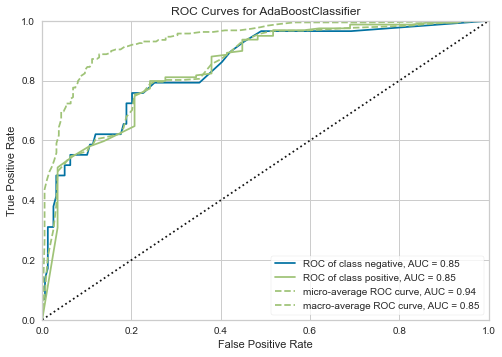

In [163]:
plot_model(best_model, plot="auc")

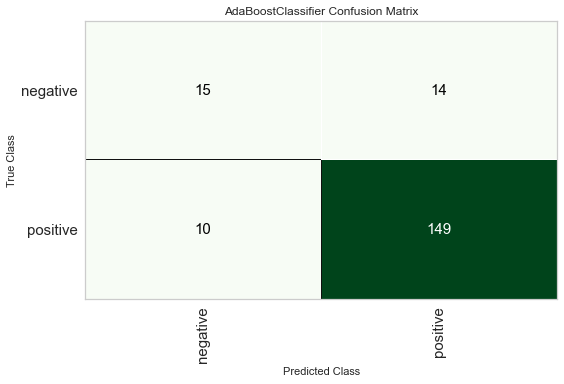

In [164]:
plot_model(best_model, plot="confusion_matrix")

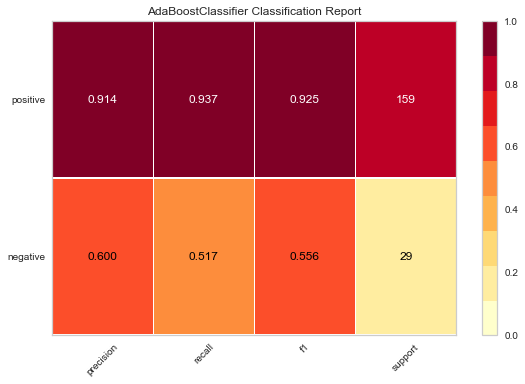

In [165]:
plot_model(best_model, plot="class_report")

In [166]:
final_model = finalize_model(best_model)

In [167]:
predict_unseen = predict_model(final_model, data=new_test_df);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0,0.8955,0,0,0,0,0


In [168]:
predict_unseen

,vote,review_rating_score,summary_rating_score,length_summary,length_review,derived_ratings,Label,Score
317,0,0.5400,0.5400,26,227,positive,positive,1.00
692,4,-0.6597,-0.4019,41,323,negative,negative,0.80
124,0,0.9465,0.4215,39,501,positive,positive,0.97
649,0,0.6633,0.5719,14,150,positive,positive,1.00
784,0,0.8979,0.7249,27,108,positive,positive,1.00
...,...,...,...,...,...,...,...,...
711,0,-0.9216,0.0000,22,273,positive,negative,0.58
874,0,0.7269,0.0000,10,20,positive,positive,0.99
954,0,0.7870,-0.5574,38,249,positive,positive,0.96
877,0,0.4588,0.0000,10,30,positive,positive,1.00


In [174]:
save_model(final_model,"deployment_pycaret_NLTK_04072022")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='derived_ratings',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                                                                         criterion='gini',
                                                                         max_depth=None,
                                                       